# Hypothesis Core 
Nokuthula Mchunu

Use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

State your Null Hypothesis and Alternative Hypothesis
Select the correct test according to the data type and number of samples
Test the assumptions of your selected test.
Execute the selected test, or the alternative test (if you do not meet the assumptions)
Interpret your p-value and reject or fail to reject your null hypothesis 
Show a supporting visualization that helps display the result

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# populating df
url = '/Users/noksmchunu/Downloads/insurance - insurance.csv'
df = pd.read_csv(url)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. Do smokers have higher insurance charges than non-smokers?

In [6]:
# Explore the data:
# see how many with and without strength
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
# Filtering out those who smoke and those who dont 
ssmoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()


In [10]:
ssmoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [12]:
#Define our feature of interest
smoker_charge = ssmoker_df['charges']
no_smoker_charge = non_smoker_df['charges']


In [14]:
# Check for outliers in charges for smoker group
zscores= stats.zscore(smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)


0

In [15]:
# Check for outliers in charges for non-smoker group
zscores= stats.zscore(no_smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)


24

In [17]:
# remove outliers from non-smoker group
no_smoker_charge = no_smoker_charge[(np.abs(stats.zscore(no_smoker_charge)) < 3)]


Check for Normality

In [18]:
# test the smoker group for normality
result_smoker_charge = stats.normaltest(smoker_charge)
result_smoker_charge

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036462e-14)

In [19]:
# test the non - smoker group for normality
result_no_smoker_charge = stats.normaltest(no_smoker_charge)
result_no_smoker_charge


NormaltestResult(statistic=70.72942109230829, pvalue=4.3782580585265917e-16)

Our p-values for both groups are well below 0.05, which means our data is NOT normally distributed

In [20]:
# Test for equal variance
result = stats.levene(smoker_charge, no_smoker_charge)
result

LeveneResult(statistic=672.9614970899742, pvalue=8.51943690683427e-120)

Our p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between the charges of smoker and non smoker.

## Q2. Are men more likely to smoke than women?

 ## - Q3. Do different regions have different charges, on average?

The null hypothesis for ANOVA is that all group's means are the same. (There is no statistical difference between groups.)

The alternate hypothesis is that there is a difference in group's means. (There is a statistical difference between groups.)

One Way ANOVA

Normality
Equal variance
No significant outliers

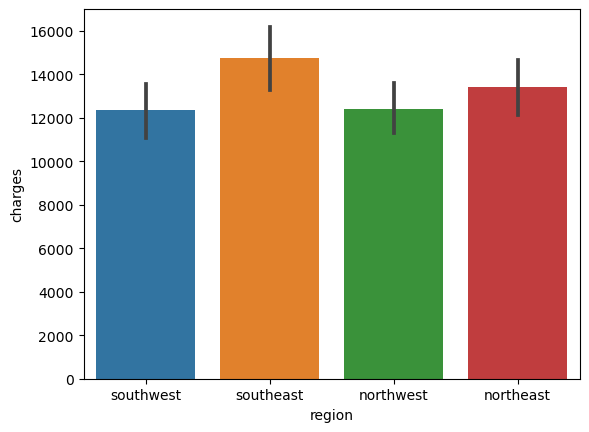

In [22]:
sns.barplot(data=df, x='region',y='charges');


Hypothesis

Null Hypothesis:  Different regions all have the same charges. 

Alternative Hypothesis: Different regions have different charges. 

Using an alpha=.05

Note that our hypothesis does NOT specify which groups are different, just that there is or isn't a difference when taking all three into consideration.

In [23]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
regions = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    regions[i] = data
regions.keys()


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing Assumptions

In [24]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in regions.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [25]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


group has distribution that is not normal.

### Testing Assumption of Equal Variance

In [27]:
# with the * operator 
stats.levene(*regions.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250782834)

One-Way ANOVA Test

In [28]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *regions.values())
result


F_onewayResult(statistic=2.96962669358912, pvalue=0.030893356070506986)

Tukey's Pairwise Multiple Comparisons Test

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']


In [31]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True
